## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata,  on = "Mouse ID",how = "outer" )
combined_data_df.head()

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
Number_mice =combined_data_df["Mouse ID"].nunique()
Number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_MouseId = combined_data_df.loc[combined_data_df.duplicated (subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_MouseId

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

getting_dupes =combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]
getting_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_MouseId) == False]
mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats = mouse_clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=summary_stats.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=summary_stats.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=summary_stats.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std=summary_stats.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=summary_stats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance ":variance, "Tumor Volume Std Dev.": std, "Tumor Volume Std Err.": sem})
summary_df=summary_df.round(6)
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
#aggsummary_df = pd.DataFrame({"mean":mean,"median":median,"var":variance,"std":sd,"sem":sem})
#aggsummary_df

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg('mean', axis='rows')

Mean Tumor Volume         50.975982
Median Tumor Volume       49.902123
Tumor Volume Variance     47.858440
Tumor Volume Std Dev.      6.821103
Tumor Volume Std Err.      0.502786
dtype: float64

## Bar and Pie Charts

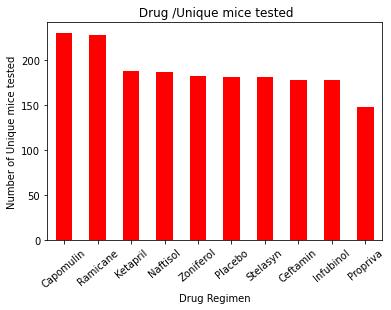

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_regimen_pd = mouse_clean_df["Drug Regimen"].value_counts()
y_axis = drug_regimen_pd.values
x_axis = drug_regimen_pd.index
drug_regimen_pd.plot(kind = "bar", facecolor='red',)
plt.ylabel("Number of Unique mice tested")
plt.xlabel("Drug Regimen")
plt.title(" Drug /Unique mice tested")
plt.xticks(rotation = 40)
plt.show()

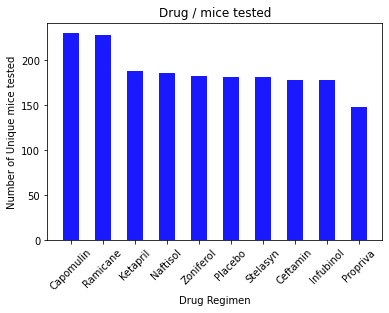

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_regimen_py= mouse_clean_df["Drug Regimen"].value_counts()
y_axis=drug_regimen_py.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_regimen_py.index
plt.bar(x_drugs, y_axis, color='b', alpha=0.9, align = "center", width= .5)
plt.ylabel("Number of Unique mice tested")
plt.xlabel("Drug Regimen")
plt.title("Drug / mice tested")
plt.xticks(rotation="45")
plt.show()


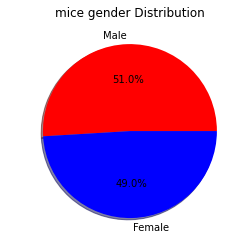

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_males_pd = mouse_clean_df["Sex"].value_counts()
labels = female_males_pd.values

sizes = female_males_pd.values
colors = ["red", "blue"]
female_males_pd.plot(kind = "pie",colors = colors, autopct="%1.1f%%", shadow=True)

plt.title("mice gender Distribution")
plt.ylabel(" ")
plt.show()


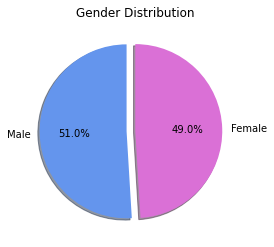

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_males_py = mouse_clean_df["Sex"].value_counts()
labels = female_males_py.index 

sizes = female_males_py.values
colors = ["cornflowerblue", "orchid"]
explode = [0.1,0]

plt.pie(sizes , explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
 # Determine outliers using upper and lower bounds
    

tumor_final_vol = mouse_clean_df.groupby("Mouse ID").max().reset_index()
merge_final_clean = tumor_final_vol[["Mouse ID","Timepoint"]].merge(mouse_clean_df, on=["Mouse ID","Timepoint"], how='left')
merge_final_clean.round(2)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [23]:
capomulin = merge_final_clean.loc[merge_final_clean['Drug Regimen']  == 'Capomulin']['Tumor Volume (mm3)']
ramicane  = merge_final_clean.loc[merge_final_clean['Drug Regimen']  == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_final_clean.loc[merge_final_clean['Drug Regimen']  == 'Infubinol']['Tumor Volume (mm3)']
ceftamin  = merge_final_clean.loc[merge_final_clean['Drug Regimen']  == 'Ceftamin']['Tumor Volume (mm3)']
  

In [16]:

 
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    
#Capomulin
Capomulin_quartile = capomulin.quantile([.25,.5,.75])
Capomulin_lower   = Capomulin_quartile[.25]
Capomulin_upper   = Capomulin_quartile[.75]
Capomulin_iqr     = Capomulin_upper - Capomulin_lower
lowBound_Capomulin   = Capomulin_lower - (1.5*Capomulin_iqr)
upperBound_Capomulin    = Capomulin_upper + (1.5*Capomulin_iqr)

#Ramicane
Ramicane_quartile = ramicane.quantile([.25,.5,.75])
Ramicane_lower = Ramicane_quartile[.25]
Ramicane_upper = Ramicane_quartile[.75]
Ramicane_iqr = Ramicane_upper-Ramicane_lower
lowBound_Ramicane  = Ramicane_lower-(1.5*Ramicane_iqr)
upperBound_Ramicane = Ramicane_upper+(1.5*Ramicane_iqr)

#Infubinol
Infubinol_quartile = infubinol.quantile([.25,.5,.75])
Infubinol_lower = Infubinol_quartile[.25]
Infubinol_upper = Infubinol_quartile[.75]
iqr_Infubinol = Infubinol_upper-Infubinol_lower
lowBound_Infubinol = Infubinol_lower-(1.5*iqr_Infubinol)
upperBound_Infubinol = Infubinol_upper+(1.5*iqr_Infubinol)

#Ceftamin
Ceftamin_quartile =ceftamin.quantile([.25,.5,.75])
Ceftamin_lower = Ceftamin_quartile[.25]
Ceftamin_upper = Ceftamin_quartile[.75]
iqr_Ceftamin = Ceftamin_upper-Ceftamin_lower
lowBound_Ceftamin = Ceftamin_lower-(1.5*iqr_Ceftamin)
upperBound_Ceftamin = Ceftamin_upper+(1.5*iqr_Ceftamin)

print(f"Below {round(lowBound_Capomulin,2)} is an outlier for Capomulin")
print(f"Above {round(upperBound_Capomulin, 2)} is an outlier for Capomulin")
print(f"Below {round(lowBound_Ramicane, 2)} is an outlier for Ramicane")
print(f"Above {round(upperBound_Ramicane, 2)} is an outlier for Ramicane")
print(f"Below {round(lowBound_Infubinol, 2)} is an outlier for Infubinol")
print(f"Above {round(upperBound_Infubinol, 2)} is an outlier for Infubinol")
print(f"Below {round(lowBound_Ceftamin, 2)} is an outlier for Ceftamin")
print(f"Above {round(upperBound_Ceftamin, 2)} is an outlier for Ceftamin")



Below 31.2 is an outlier for Capomulin
Above 87.64 is an outlier for Capomulin
Below 17.91 is an outlier for Ramicane
Above 54.31 is an outlier for Ramicane
Below 36.83 is an outlier for Infubinol
Above 82.74 is an outlier for Infubinol
Below 25.36 is an outlier for Ceftamin
Above 87.67 is an outlier for Ceftamin


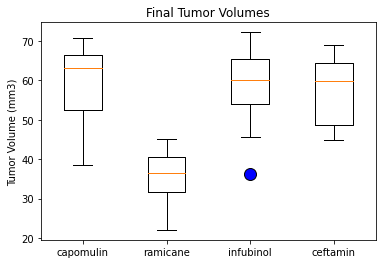

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor='b',markersize = 12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= box_plot)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

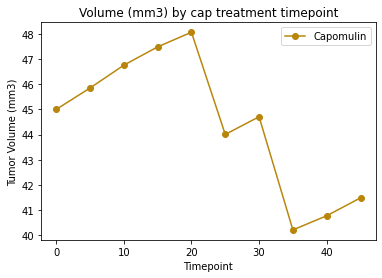

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_treat= mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Capomulin']
mouse_capomulin= mouse_clean_df.loc[mouse_clean_df['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"], marker ='o', color='darkgoldenrod', label="Capomulin")
plt.legend(loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Volume (mm3) by cap treatment timepoint")
plt.show()

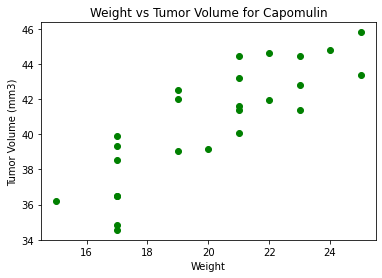

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tumor_volume = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Capomulin']
capomulin_average=tumor_volume.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"],facecolors="g")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept,rvalue, pvalue, stderr)= linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
regress_values = capomulin_average["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"] )
plt.plot(capomulin_average["Weight (g)"], regress_values, color='thistle')
plt.annotate(line_eq,(20,36), color='steelblue', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume Capomulin")
plt.show()

NameError: name 'linregress' is not defined